In [61]:
%matplotlib inline


# Retrieving and analyzing GOES X-Ray Sensor (XRS) data

The X-ray Sensor (XRS) on board the GOES series of satellites
have provided soft X-ray measurements in two broadband energy
ranges 0.5-4 and 1-8 angstrom since 1975. The GOES 16 and 17
satellites are the latest in line. The flux levels in the GOES
1-8 angstrom channel are used to report flares and determine
their size (i.e. their GOES class).

In this example we are going to look at how you can query and
retrieve the GOES XRS data using `~sunpy.net.Fido` and load it
into a `~sunpy.timeseries.TimeSeries`.

Some things to note: NOAA have recently re-processed the GOES 13,
14 and 15 XRS science quality data, such that the SWPC scaling factor
has been removed. This means that the fluxes will have a different values,
and so will flare peak fluxes from previous 13, 14 and 15 XRS data. See
`here <https://satdat.ngdc.noaa.gov/sem/goes/data/science/xrs/GOES_13-15_XRS_Science-Quality_Data_Readme.pdf>`__
for more details. The sunpy GOES XRS client for Fido now provides this
new re-processed data. We now also provide the data for GOES 16 and 17.

Another thing to note is that the GOES XRS client `~sunpy.net.Fido` now
returns all available GOES data for the specific timerange queried. For
example, there are times when GOES 13, 14 and 15 overlap and such data is
available from each satellite. Similarly there are times when GOES 16 and 17 overlap.


In [62]:
import matplotlib.pyplot as plt
import numpy as np

from sunpy import timeseries as ts
from sunpy.net import Fido
from sunpy.net import attrs as a

In [69]:
print(Fido)

sunpy.net.Fido

Fido is a unified data search and retrieval tool.

It provides simultaneous access to a variety of online data sources, some
cover multiple instruments and data products like the Virtual Solar
Observatory and some are specific to a single source.

For details of using `~sunpy.net.Fido` see :ref:`fido_guide`.


      Client      ...
----------------- ...
EVEClient         ...
GBMClient         ...
XRSClient         ...
SUVIClient        ...
GONGClient        ...
LYRAClient        ...
NOAAIndicesClient ...
NOAAPredictClient ...
SRSClient         ...
NoRHClient        ...
RHESSIClient      ...
HEKClient         ...
HECClient         ...
JSOCClient        ...
VSOClient         ...


Lets first define our start and end times and query using the
`~sunpy.net.Fido`.



In [35]:
# tstart = "2015-06-21 01:00"
# tend = "2015-06-21 23:00"

tstart = "2021-09-07 01:00"
tend = "2021-09-07 23:00"

result = Fido.search(a.Time(tstart, tend), a.Instrument("XRS"))
print(result)

Results from 1 Provider:

2 Results from the XRSClient:
       Start Time               End Time        Instrument ... Source Provider
----------------------- ----------------------- ---------- ... ------ --------
2021-09-07 00:00:00.000 2021-09-07 23:59:59.999        XRS ...   GOES     NOAA
2021-09-07 00:00:00.000 2021-09-07 23:59:59.999        XRS ...   GOES     NOAA




/Users/thomas/opt/miniconda3/lib/python3.9/site-packages/astropy/table/table.py:3409: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other


In [64]:
tstart = "2020-06-07 01:00"
tend = "2020-06-07 23:00"

result = Fido.search(a.Time(tstart, tend), a.Instrument("WIND"))
print(result)

Results from 1 Provider:

0 Results from the VSOClient:
<No columns>




In [34]:
result[0][0]

Start Time,End Time,Instrument,SatelliteNumber,Physobs,url,Source,Provider
object,object,str3,int64,str10,str161,str4,str4
2021-09-07 00:00:00.000,2021-09-07 23:59:59.999,XRS,16,irradiance,https://data.ngdc.noaa.gov/platforms/solar-space-observing-satellites/goes/goes16/l2/data/xrsf-l2-flx1s_science/2021/09/sci_xrsf-l2-flx1s_g16_d20210907_v2-1-0.nc,GOES,NOAA


As we can see this now returns three results, one file for GOES
13, one for GOES 14 and one for GOES 15, which can be identified
by the ``SatelliteNumber`` column. However, we probably will only want
one of these files for our analysis, so we can query by the `sunpy.net.attrs`:
`sunpy.net.dataretriever.attrs.goes.SatelliteNumber` to specify what GOES satellite number we want
to use.



In [36]:
result_goes15 = Fido.search(a.Time(tstart, tend), a.Instrument("XRS"), a.goes.SatelliteNumber(16))
print(result_goes15)

# result_goes15 = Fido.search(a.Time(tstart, tend), a.Instrument("XRS"), a.goes.SatelliteNumber(15))
# print(result_goes15)

Results from 1 Provider:

1 Results from the XRSClient:
       Start Time               End Time        Instrument ... Source Provider
----------------------- ----------------------- ---------- ... ------ --------
2021-09-07 00:00:00.000 2021-09-07 23:59:59.999        XRS ...   GOES     NOAA




Now we can see that this returns just one file for the GOES 15 data.
Lets now download this data using `~sunpy.net.fido_factory.UnifiedDownloaderFactory.fetch`.



In [37]:
file_goes15 = Fido.fetch(result_goes15)

Files Downloaded: 100%|█████████████████████████| 1/1 [00:00<00:00,  1.55file/s]


Lets now load this data into a `~sunpy.timeseries.TimeSeries`,
and inspect the data using `~sunpy.timeseries.GenericTimeSeries.peek()`.



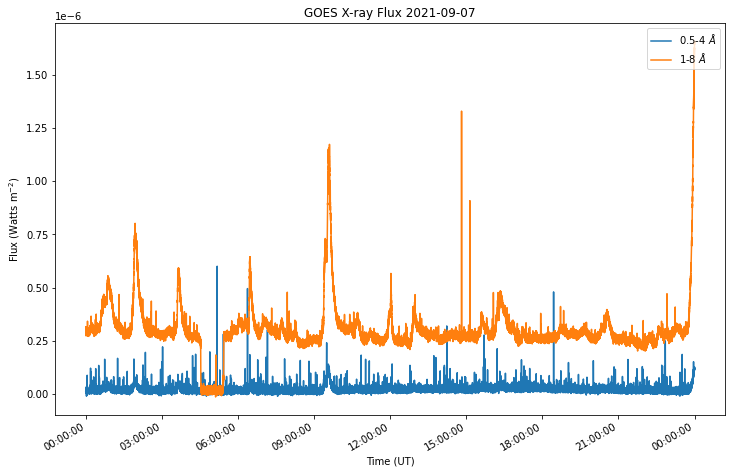

In [59]:
import matplotlib.dates as mdates

sample_path = '/Users/thomas/SS Research Project'


goes_15 = ts.TimeSeries(file_goes15)
# goes_15.peek()

fig = plt.figure(figsize=(12, 8))
ax = plt.subplot(111)

#ax.plot(goes_15)

goes_15.plot()

#goes_15.peek()

ax.set_title('GOES X-ray Flux 2021-09-07')
#ax.set_ylim([10**-9, 10**-2])
ax.set_ylabel("Flux (Watts m$^{-2}$)")
ax.set_xlabel("Time (UT)")

date_format = mdates.DateFormatter('%H:%M:%S')
ax.xaxis.set_major_formatter(date_format)

plt.legend(('0.5-4 $\AA$', '1-8 $\AA$'), loc='upper right')

# fig.savefig(sample_path + "/GOES_X-ray_plot.png")


# 	My_FIGURE = plt.figure(figsize=(14.,10.))
# 	ax1 = plt.subplot2grid((3, 1), (0, 0))
# 	ax1.xaxis_date()
# 	date_format = mdates.DateFormatter('%H:%M:%S')
# 	ax1.xaxis.set_major_formatter(date_format)
# 	ax1.set_xlim([datetime.datetime(start_year, start_month, start_day, start_hour, start_minute, start_second), datetime.datetime(start_year, start_month, start_day, end_hour, end_minute, end_second)])
# 	lineObjectsgoes = ax1.plot(goes)
# 	ax1.set_title('GOES X-ray Flux')
# 	ax1.set_ylim([10**-9, 10**-2])
# 	ax1.set_ylabel("Flux (Watts m$^{-2}$)")
# 	plt.legend(iter(lineObjectsgoes), ('0.5-4 $\AA$', '1-8 $\AA$'), loc='upper right')	
# 	plt.yscale('log')
# 	ax1.axes.get_xaxis().set_visible(False)


We can also pull out the individual GOES chanels and plot. The 0.5-4 angstrom
channel is known as the "xrsa" channel and the 1-8 angstrom channel is known
as the "xrsb" channel.



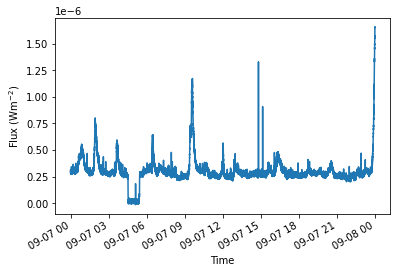

In [39]:
fig, ax = plt.subplots()
ax.plot(goes_15.index, goes_15.quantity("xrsb"))
ax.set_ylabel("Flux (Wm$^{-2}$)")
ax.set_xlabel("Time")
fig.autofmt_xdate()
plt.show()

We can also truncate the data for the time of the large flare,
and analyze the different channels. For example, we can plot the
derivative which is useful in terms of the Neupert effect when analyzing
flares.



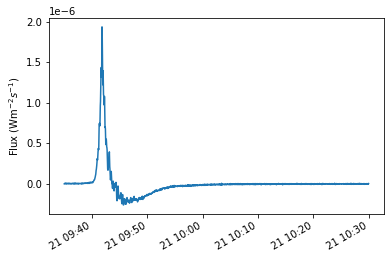

In [8]:
goes_flare = goes_15.truncate("2015-06-21 09:35", "2015-06-21 10:30")
fig, ax = plt.subplots()
ax.plot(goes_flare.index, np.gradient(goes_flare.quantity("xrsb")))
ax.set_ylabel("Flux (Wm$^{-2}$$s^{-1}$)")
fig.autofmt_xdate()
plt.show()

## GOES 16 and 17 data
Since March 2020, data prior to GOES 15 (incl) is no longer supported
by NOAA and GOES 16 and 17 data is now provided. See
`here <https://data.ngdc.noaa.gov/platforms/solar-space-observing-satellites/goes/goes16/l2/docs/GOES-R_XRS_L2_Data_Users_Guide.pdf>`__
for more details. GOES 16 and 17 are part of the GOES-R series and provide
XRS data at a better time resolution (1s). sunpy now supports this data also.
GOES 16 has been taking observations from 2017, and GOES 17 since 2018, both of
which are now and its now available through sunpy.net.Fido.



Lets query for some recent data over two days.



In [9]:
results = Fido.search(a.Time("2020-11-20 00:00", "2020-11-21 23:00"), a.Instrument("XRS"))
print(results)

Results from 1 Provider:

4 Results from the XRSClient:
       Start Time               End Time        Instrument ... Source Provider
----------------------- ----------------------- ---------- ... ------ --------
2020-11-20 00:00:00.000 2020-11-20 23:59:59.999        XRS ...   GOES     NOAA
2020-11-21 00:00:00.000 2020-11-21 23:59:59.999        XRS ...   GOES     NOAA
2020-11-20 00:00:00.000 2020-11-20 23:59:59.999        XRS ...   GOES     NOAA
2020-11-21 00:00:00.000 2020-11-21 23:59:59.999        XRS ...   GOES     NOAA




/Users/thomas/opt/miniconda3/lib/python3.9/site-packages/astropy/table/table.py:3409: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other


We can see that we are provided with 4 results, two files for GOES 16
and two for GOES 17. Again we can make the query only specifying one
GOES satellite number.



In [10]:
results_16 = Fido.search(a.Time("2020-11-20 00:00", "2020-11-21 23:00"), a.Instrument("XRS"),
                         a.goes.SatelliteNumber(16))
print(results_16)

Results from 1 Provider:

2 Results from the XRSClient:
       Start Time               End Time        Instrument ... Source Provider
----------------------- ----------------------- ---------- ... ------ --------
2020-11-20 00:00:00.000 2020-11-20 23:59:59.999        XRS ...   GOES     NOAA
2020-11-21 00:00:00.000 2020-11-21 23:59:59.999        XRS ...   GOES     NOAA




Lets now download this data and load into a
`~sunpy.timeseries.TimeSeries`.



Files Downloaded:   0%|                                 | 0/2 [00:00<?, ?file/s]

sci_xrsf-l2-flx1s_g16_d20201121_v2-1-0.nc:   0%|    | 0.00/5.01M [00:00<?, ?B/s]
sci_xrsf-l2-flx1s_g16_d20201120_v2-1-0.nc:   0%|    | 0.00/5.02M [00:00<?, ?B/s]
sci_xrsf-l2-flx1s_g16_d20201120_v2-1-0.nc:   0%| | 2.00/5.02M [00:00<533:03:15, 

sci_xrsf-l2-flx1s_g16_d20201121_v2-1-0.nc:   0%| | 100/5.01M [00:00<11:27:14, 12
sci_xrsf-l2-flx1s_g16_d20201120_v2-1-0.nc:   0%| | 8.10k/5.02M [00:00<06:45, 12.

sci_xrsf-l2-flx1s_g16_d20201121_v2-1-0.nc:   0%| | 15.0k/5.01M [00:00<03:45, 22.
sci_xrsf-l2-flx1s_g16_d20201120_v2-1-0.nc:   3%| | 161k/5.02M [00:01<00:20, 239k

sci_xrsf-l2-flx1s_g16_d20201121_v2-1-0.nc:   3%| | 145k/5.01M [00:01<00:23, 205k
sci_xrsf-l2-flx1s_g16_d20201120_v2-1-0.nc:   8%| | 411k/5.02M [00:01<00:09, 500k

sci_xrsf-l2-flx1s_g16_d20201121_v2-1-0.nc:   9%| | 426k/5.01M [00:01<00:08, 511k
sci_xrsf-l2-flx1s_g16_d20201120_v2-1-0.nc:  19%|▏| 941k/5.02M [00:01<00:03, 1.25

sci_xrsf-l2-flx1s_g16_

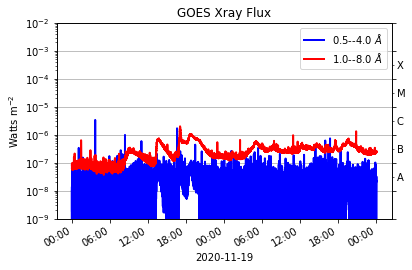

In [11]:
files = Fido.fetch(results_16)
# We use the `concatenate=True` keyword argument in TimeSeries, as
# we have two files and want to create one timeseries from them.
goes_16 = ts.TimeSeries(files, concatenate=True)
goes_16.peek()